In [182]:
import pandas as pd

In [183]:
data = pd.read_csv("C:\\Users\\rinuc\\Downloads\\crime_data.csv")

In [184]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [186]:
#normalization

In [187]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [188]:
df = norm_fun(data.iloc[:,1:])

In [189]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [190]:
dfh = df.copy()

In [191]:
dfk = df.copy()

In [192]:
dfd = df.copy()

In [193]:
import scipy.cluster.hierarchy as sch

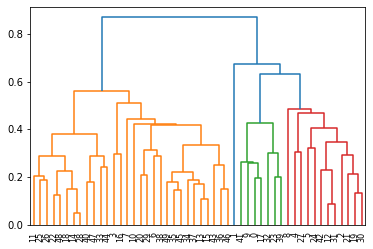

In [194]:
dendrogram = sch.dendrogram(sch.linkage(dfh,method='average'))

In [195]:
from sklearn.cluster import AgglomerativeClustering

In [196]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [197]:
hc.fit(dfh)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [198]:
hc.fit_predict(dfh)

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 4, 1, 0, 4, 0, 0, 3, 4, 1, 0, 1,
       4, 3, 1, 4, 4, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 0, 0, 4, 4, 0], dtype=int64)

In [199]:
y_hc = hc.fit_predict(dfh)

In [200]:
clusters = pd.DataFrame(y_hc, columns =['Clusters'])

In [201]:
dfh['h_clusterid'] = clusters

In [202]:
dfh.sort_values("h_clusterid")

,Murder,Assault,UrbanPop,Rape,h_clusterid
49,0.361446,0.397260,0.474576,0.214470,0
29,0.397590,0.390411,0.966102,0.297158,0
16,0.536145,0.219178,0.338983,0.232558,0
15,0.313253,0.239726,0.576271,0.276486,0
34,0.391566,0.256849,0.728814,0.364341,0
13,0.385542,0.232877,0.559322,0.354005,0
35,0.349398,0.363014,0.610169,0.328165,0
36,0.246988,0.390411,0.593220,0.568475,0
20,0.216867,0.356164,0.898305,0.232558,0
10,0.271084,0.003425,0.864407,0.333333,0


In [203]:
dfh.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,0.316600,0.325533,0.666667,0.294143
1,1,0.607430,0.725742,0.785311,0.644703
2,2,0.554217,0.746575,0.271186,0.961240
3,3,0.835628,0.706458,0.377724,0.371724
4,4,0.138052,0.106164,0.340395,0.117140


In [204]:
#Out of the 5 clusters that are formed, cluster 1 is the most populated, they also have the second highest Assault and murder 
#rates. The 2nd and 3rd cluster is relatively low in urbanpop though they have the heighest Assault, rape and murder rate
#cluster 0 has the second heighest urbanpop, however, they have comparitively less murder, assault and rape rates
#Cluster 4 has the least murder, assault and rape rate and the lowest urban pop

#What we can infer is that eventhough Urbanpop can be a contributing factor to the murder, assault and rape rates, It alone
#cannot be the deciding factor

In [205]:
#K-means clustering

In [206]:
#finding the ideal number for K

In [207]:
from sklearn.cluster import KMeans

In [208]:
wess= []
a = [1,2,3,4,5,6,7,8,9,10,11]

In [209]:
for i in a:
    k = KMeans(n_clusters=i, random_state = 0)
    k.fit(dfk)
    wess.append(k.inertia_)

C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [210]:
from matplotlib import pyplot as plt

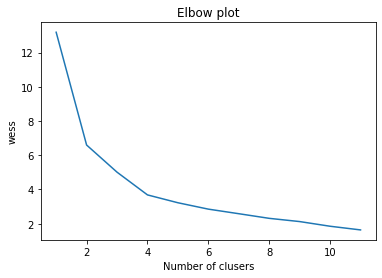

In [211]:
plt.plot(a,wess)
plt.title('Elbow plot')
plt.xlabel('Number of clusers')
plt.ylabel('wess')
plt.show()

In [31]:
#considering K = 4

In [212]:
kmeans = KMeans(4,random_state =42)

In [213]:
kmeans.fit(dfk)

KMeans(n_clusters=4, random_state=42)

In [214]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [215]:
dfk['K_cluster']= kmeans.labels_

In [216]:
dfk.sort_values('K_cluster')

,Murder,Assault,UrbanPop,Rape,K_cluster
18,0.078313,0.130137,0.322034,0.012920,0
48,0.108434,0.027397,0.576271,0.090439,0
22,0.114458,0.092466,0.576271,0.196382,0
28,0.078313,0.041096,0.406780,0.056848,0
16,0.536145,0.219178,0.338983,0.232558,0
14,0.084337,0.037671,0.423729,0.103359,0
25,0.313253,0.219178,0.355932,0.235142,0
11,0.108434,0.256849,0.372881,0.178295,0
44,0.084337,0.010274,0.000000,0.100775,0
26,0.210843,0.195205,0.508475,0.237726,0


In [217]:
kmeans.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [218]:
dfk.groupby('K_cluster').agg(['mean']).reset_index()

,K_cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,0.168675,0.114858,0.340287,0.126019
1,1,0.612450,0.750000,0.754237,0.679802
2,2,0.791416,0.680223,0.368644,0.364664
3,3,0.304394,0.329371,0.705882,0.310990


In [263]:
#Four clusters are formed in Kmean, population is highest int he second cluster (1), crime rates are also relatively high
#The fourth cluster, cluster-3 is the second most dense Urban population, however, the crime rates are low
#The third cluster, clusteer-2 does not have a dense urban population, but the murder and assault rates are high
#The cluster-0 has the least Urban pop and the least crime rates

In [219]:
from sklearn.neighbors import NearestNeighbors
import numpy as np


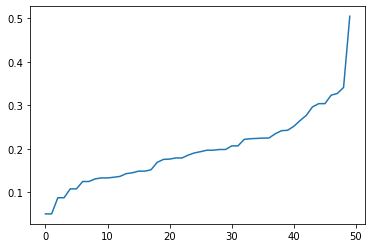

In [220]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(dfd)
distances, indices = nbrs.kneighbors(dfd)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [42]:
#DBSCAN clusterign

In [221]:
array = dfd.values

In [222]:
from sklearn.cluster import DBSCAN

In [271]:
dbscan = DBSCAN(eps=.4 , min_samples=10)

In [272]:
dbscan.fit(dfd)

DBSCAN(eps=0.4, min_samples=10)

In [273]:
dbscan.labels_

array([-1, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [274]:
c = pd.DataFrame(dbscan.labels_, columns=['D_cluster'])

In [275]:
dfd['D_cluster'] = c

In [276]:
dfd.head()

,Murder,Assault,UrbanPop,Rape,D_cluster
0,0.746988,0.654110,0.440678,0.359173,-1
1,0.554217,0.746575,0.271186,0.961240,-1
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,0


In [277]:
dfd.groupby('D_cluster').agg(['mean']).reset_index()

,D_cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,0.808090,0.743151,0.351090,0.436693
1,0,0.357943,0.379818,0.603863,0.347515
